# CSE4820: Homework 2



---

**Due**: Fri, March 28, 11:59 PM

**Total Points**: 100


**How to submit**: Create a zip folder named "HW2_your name". Include the `.ipynb` file with your answers PLUS its `.html` file as a backup. 

**Important**: The places that require your code answer are marked with `"# YOUR CODE"` comments. Do not remove `"# YOUR CODE"`marks.


Good Luck!

---

## Name:[Enter your name here]

---

## 1) [10 pts]
Given the array `A` below, use numpy.bincount to find the most frequent integer in that array.


In [1]:
import numpy as np
rng = np.random.RandomState(42)
A = rng.randint(0, 20, 100)
print(repr(A))
# YOUR CODE
counts = np.bincount(A)
most_frequent_value = np.argmax(counts)
print("The most frequent integer in A is:", most_frequent_value)


array([ 6, 19, 14, 10,  7,  6, 18, 10, 10,  3,  7,  2,  1, 11,  5,  1,  0,
       11, 11, 16,  9, 15, 14, 14, 18, 11, 19,  2,  4, 18,  6,  8,  6, 17,
        3, 13, 17,  8,  1, 19, 14,  6, 11,  7, 14,  2, 13, 16,  3, 17,  7,
        3,  1,  5,  9,  3, 17, 11,  1,  9,  3, 13, 15, 14,  7, 13,  7, 15,
       12, 17, 14, 12,  8, 14, 12,  0,  6,  8,  0, 11,  7, 10, 18, 16,  7,
        2,  2,  0,  4,  9,  6,  8,  6,  8,  7, 11,  1,  0, 15,  4])
The most frequent integer in A is: 7


## 2) [10 pts]
Suppose `y_true` and `y_pred` are lists of true class labels and predicted class labels by a classifier respectively. Calculate accuracy **in percent without** using any external libraries like NumPy or scikit-learn.

In [2]:
y_true = [1, 2, 0, 4, 1, 2, 3, 1, 2, 1]
y_pred = [1, 2, 1, 4, 1, 0, 3, 1, 2, 1]


correct = 0
total_elements = len(y_true)
for i, j in zip(y_true, y_pred):
    # YOUR CODE 
    if i == j:
        correct += 1
        
accuracy = (correct / total_elements) * 100  # YOUR CODE
        
print('Accuracy: %.2f%%' % (accuracy))

Accuracy: 80.00%


## 3) [20 pts]
Implement a function that calculates balanced accuracy (also called average-per-class-accuracy). You can use any library or function, except the functions that directly calculate confusion matrix or balanced accuracy.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def balanced_accuracy(y_true, y_predicted):
    
    # Calculate the confusion matrix values
    tp = 0
    tn = 0
    fp = 0
    fn = 0    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_predicted[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_predicted[i] == 0: # YOUR CODE
            tn += 1
        elif y_true[i] == 0 and y_predicted[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_predicted[i] == 0:
            fn += 1
 
    #compute sens. (recall for pos.) and specificity (recall for neg.)
    #guard against division by zero
    recall_pos = tp / (tp + fn) if (tp + fn) != 0 else 0
    recall_neg = tn / (tn + fp) if (tn + fp) != 0 else 0

    #balanced accuracy is the average of recall_pos and recall_neg
    balanced_acc = (recall_pos + recall_neg) / 2.0
        
        
        
        
    '''
    # You can compare the values you get with the confusion matrix values from sklearn using:
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()
    '''
    
    return balanced_acc # YOUR CODE
    

In [4]:
# RUN THIS CELL, BUT DO NOT MODIFY 

from sklearn.metrics import balanced_accuracy_score

true_labels = np.array(21*[0] + 69*[1])
predicted_labels = np.array(40*[0] + 50*[1])
 
print('Balanced accuracy using sklearn: %.2f%%' % (balanced_accuracy_score(true_labels, predicted_labels)))
print('Balanced accuracy using my function: %.2f%%' % (balanced_accuracy(true_labels, predicted_labels)))


Balanced accuracy using sklearn: 0.86%
Balanced accuracy using my function: 0.86%


## 4) [30 pts]

Run the following code and answer the following questions:

(a) How do accuracy change with changing the tree maximum depth (line 17)? **[Your answer]** 

According to the sklearn documentation, `min_samples_leaf` sets the minimum number of samples a leaf node must have. If a split would create a leaf with fewer samples, that split is prevented. When you use a larger `min_samples_leaf`, you get fewer, bigger leaves and a simpler tree, which can help avoid overfitting but might increase underfitting. On the other hand, a small `min_samples_leaf`, such as 1, allows the tree to grow deeper, which can lead to overfitting. This parameter plays a crucial role in striking the right balance between overfitting and underfitting.

(b) What does the 'min_samples_leaf' parameter represent in a DecisionTreeClassifier according to the sklearn documentation, and how is it connected to the concepts of overfitting or underfitting? **[Your answer]**

When the maximum depth of the decision tree is set too small, such as 1 or 2, the tree is unable to capture the complexity of the data, which leads to underfitting and a drop in accuracy. As the maximum depth increases, the model becomes more flexible, causing training accuracy to rise. However, if the maximum depth is allowed to grow too large, the tree can become overly complex and may overfit, ultimately harming test accuracy. In the case of the relatively simple Iris dataset, using a moderately high maximum depth (like 10) often results in near-perfect training accuracy and a high test accuracy of around 0.9777. If you used a smaller depth, you would notice a decrease in accuracy, while excessively large depths might or might not negatively impact test accuracy depending on the random seed and how the dataset is split.

(c) List three additional parameters of a DecisionTreeClassifier as per the sklearn documentation. **[Your answer]**

Some other commonly used parameters include:

-> criterion: Specifies the function to measure the quality of a split (e.g., 'gini' or 'entropy').

->splitter: Determines the strategy used to choose the split at each node (e.g., 'best' or 'random').

->min_samples_split: The minimum number of samples required to split an internal node.

Other possible parameters include max_features, class_weight, and ccp_alpha (for pruning).


Test accuracy of decision tree classifier on Iris dataset: 0.9777777777777777


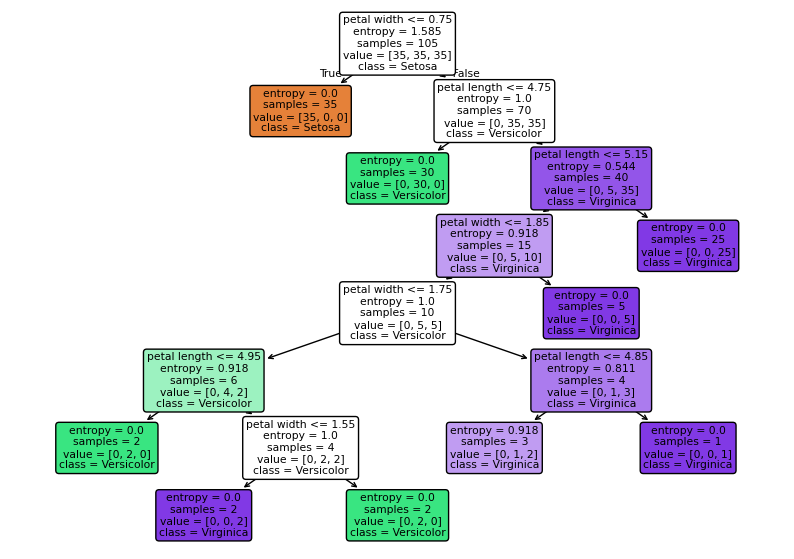

In [5]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=10, 
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy of decision tree classifier on Iris dataset: "+str(test_accuracy))

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

## 5) [30 pts] Receiver Operater Characteristic (ROC) 
In this section, you need to plot ROC curve and calculate the corresponding AUC. You are given a matrix of probabilities (`y_probabilities`) where a value in the first and second columns refers to probability that a corresponding data point belongs to class 0 and 1, respectively. 

Suppose that the positive label is 1 (`pos_label=1`). Therefore, if `y_probabilities` is 

```
[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
```
 
then, the `y_score` array, which is an input of plot_roc_curve function, is expected to be 

`y_score = [0.5599..., 0.3097..., 0.6818..., 0.4304..., ...]`


---

1- Complete the `"#YOUR CODE"` sections at plot_roc_curve function to plot the ROC curve 

2- Explain what AUC is and calculate it using auc function in sklearn. [Your answer]

The AUC, which stands for Area Under the Curve, measures the total area underneath the ROC curve. The ROC curve itself plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. When a classifier’s AUC is high, it indicates that the model is effectively separating the positive and negative classes across many different thresholds. A perfect model achieves an AUC of 1.0, meaning it flawlessly separates all positive examples from the negative ones. An AUC of 0.5, on the other hand, suggests a performance akin to random guessing.

In [6]:
# RUN THIS CELL, BUT DO NOT MODIFY 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target
X, y = X[:100, [1]], y[:100]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0, stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)

print(y_probabilities[:10])

[[0.4400118  0.5599882 ]
 [0.69025953 0.30974047]
 [0.31813893 0.68186107]
 [0.56957304 0.43042696]
 [0.86339515 0.13660485]
 [0.56957304 0.43042696]
 [0.86339515 0.13660485]
 [0.4400118  0.5599882 ]
 [0.08899174 0.91100826]
 [0.50487424 0.49512576]]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=200):

    y_true_arr = np.array(y_true)
    y_score_arr = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)

    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives

    for threshold in thresholds:
        
        # Create a vector which its value is 1, if y_score >= threshold, otherwise its value is 0
        binarized_scores = np.where(y_score >= threshold, pos_label, int(not pos_label))        
        positive_predictions = (binarized_scores == pos_label)
        
      
        true_positives = np.sum((y_true_arr == pos_label) & (binarized_scores == pos_label))   # YOUR CODE
        false_positives = np.sum((y_true_arr != pos_label) & (binarized_scores == pos_label))   # YOUR CODE
        #calculate TPR (y-axis) and FPR (x-axis)
        tpr = true_positives / float(num_positives)
        fpr = false_positives / float(num_negatives)
        
        x_axis_values.append(false_positives / float(num_negatives))
        y_axis_values.append(true_positives / float(num_positives))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Custom ROC Curve')
    
    return None

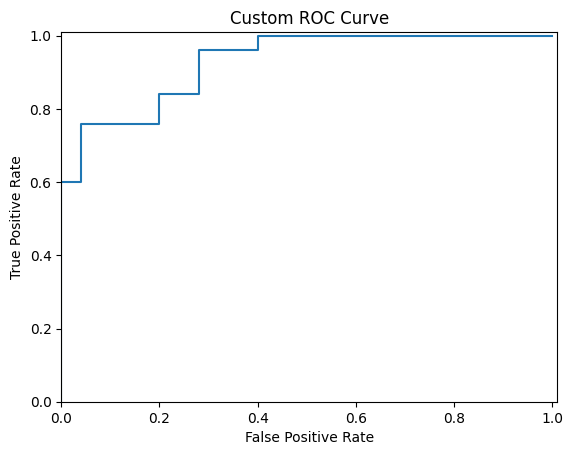

In [8]:
# RUN THIS CELL, BUT DO NOT MODIFY 

plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

In [9]:
# Calculate AUC using sklearn
from sklearn import metrics

# YOUR CODE
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
auc_value = metrics.auc(fpr, tpr)
print("AUC using sklearn's auc function:", auc_value)

AUC using sklearn's auc function: 0.9047999999999999
